In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model

In [3]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

**Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?**

In [4]:
houseprices.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

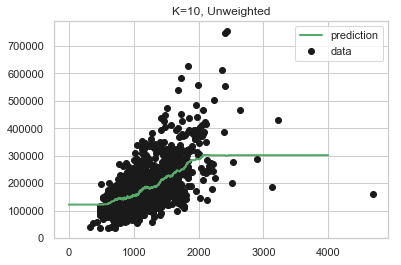

In [5]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
X = houseprices[['firstflrsf']]
Y = houseprices['saleprice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

knn.fit(X_train, Y_train)

# Set up our prediction line.
T = np.arange(0, 4000, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction', linewidth=2, markersize=12)
plt.legend()
plt.title('K=10, Unweighted')

plt.show()

In [6]:
#accuracy for KNN training set
print(knn.score(X_train, Y_train))

##accuracy for KNN test set
print(knn.score(X_test, Y_test))

0.3975363927802106
0.35971770284036664


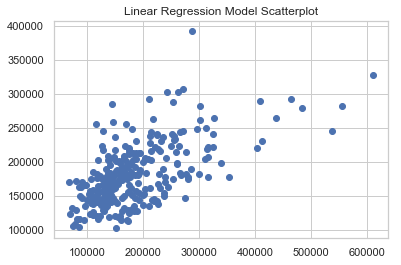

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split

X = houseprices[['firstflrsf']]
Y = houseprices['saleprice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

reg = LinearRegression()

reg.fit(X_train, Y_train)

Y_train_predict = reg.predict(X_train)

Y_test_predict = reg.predict(X_test)

plt.scatter(Y_test, Y_test_predict)
plt.title('Linear Regression Model Scatterplot')

plt.show()

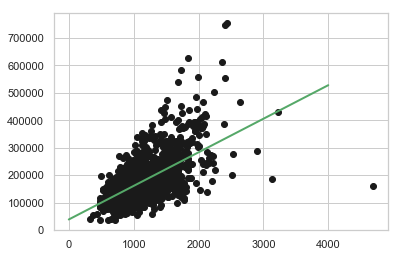

In [8]:
T = np.arange(0, 4000, 0.1)[:, np.newaxis]

Y_1 = reg.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_1, c='g', label='prediction', linewidth=2, markersize=12)


In [9]:
#accuracy for the linear regression training set 
print(reg.score(X_train, Y_train))
#accuracy for the linear regression test set 
print(reg.score(X_test, Y_test))

0.3640892321738527
0.37778794979912333


Compared to linear regression model, KNN model is not sensitive to outliers because KNN takes consideration of the closest neighbors. Compared to linear regression model, KNN doesn't depict a linear relationship between target variables and the feature variable. KNN is able to show more complexity to demonstrate the model relationship. Y variable in KNN and linear regressio models more or less increases as x increases. 

**Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model.** 

If there is an overfitting issue, I will choose linear regression model over KNN model. In this particular dataset, the differences between training set and testing sets in linear regression model and KNN model are not significant. The accuracy scores are similar. Given both models are not overfitting, we can't conclude which one is the better model. 